In [70]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer, LSTM, GRU
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [71]:
data = pd.read_excel('/kaggle/input/zedsadfn/Dados_acelerometros_trabalho_6-20231023T195638Z-001/Dados_acelerometros_trabalho_6/data.xlsx', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,1714,1715,1716,1717,1718,1719,1720,1721,1722,1723
0,8.553889,8.432109,8.590131,-8.547168,-10.251071,-8.470827,-8.055143,-3.528169,-3.622415,-2.298620,...,6.016888,-0.325251,5.281973,10.202883,7.054428,14.016219,4.082415,4.233796,8.573504,12.118682
1,8.003837,8.297730,8.678088,-8.853022,-10.010409,-8.308611,-8.188010,-3.588002,-3.360807,-2.162951,...,5.981645,0.569403,4.917949,8.801076,6.996636,13.078692,3.421439,5.238297,6.844913,9.938437
2,7.554776,8.444204,8.540014,-9.415723,-9.425648,-8.676543,-8.515270,-3.682916,-3.273328,-2.092372,...,6.413878,1.469326,4.572958,7.179480,6.778912,11.850491,3.555751,7.207860,5.863424,8.326509
3,7.390308,8.843531,8.430402,-9.745240,-8.851026,-9.251744,-9.317101,-3.622415,-3.529305,-2.316275,...,7.505342,1.977949,4.109982,6.591692,6.654326,10.860984,3.985911,9.793448,5.604166,10.467644
4,7.674017,9.119990,8.402138,-9.847721,-8.605344,-9.662151,-9.807321,-3.360807,-3.814148,-2.367355,...,8.430518,1.997417,3.599060,6.815150,5.749790,9.540650,3.969291,11.356128,5.930576,7.945388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,-5.020560,-5.544938,-4.412647,-8.428915,-8.129421,-8.659221,-0.996927,-1.217273,-0.425929,-1.805167,...,0.899162,-5.473177,-1.138155,-0.356133,-2.315073,0.026239,-0.293796,-0.926310,-0.556998,-5.352582
449,-4.945715,-5.518724,-4.466529,-8.620329,-8.277080,-8.528401,-0.996927,-0.473061,-0.756654,-1.763333,...,3.688148,-6.669697,-0.927410,-0.626101,-1.132553,0.280885,-0.944374,-0.237825,0.201579,-5.352582
450,-4.893097,-5.494175,-4.407434,-8.561227,-8.239466,-8.488557,-0.996927,-0.302829,-0.323931,-2.038227,...,6.278737,-7.170321,-1.552208,-1.567434,-0.132826,0.516666,-1.732083,-0.285768,2.034495,-5.352582
451,-4.889302,-5.324003,-4.542190,-8.465963,-8.277499,-8.453429,-0.996927,-0.425929,0.248337,-2.053038,...,5.013926,-6.084630,-0.543074,-2.938809,-0.041577,0.884623,-1.694067,-0.729342,1.061417,-5.352582


In [72]:
labels = pd.read_excel('/kaggle/input/zedsadfn/Dados_acelerometros_trabalho_6-20231023T195638Z-001/Dados_acelerometros_trabalho_6/labels.xlsx', header=None)
labels

,0,1,2,3,4,5,6,7,8,9,...,1714,1715,1716,1717,1718,1719,1720,1721,1722,1723
0,1,1,1,1,1,1,1,1,1,1,...,9,9,9,9,9,9,9,9,9,9


In [73]:
X = data.values
X

array([[ 8.55388867,  8.43210932,  8.59013052, ...,  4.23379568,
         8.57350368, 12.11868169],
       [ 8.0038375 ,  8.29773005,  8.67808761, ...,  5.2382967 ,
         6.84491319,  9.93843673],
       [ 7.55477629,  8.44420365,  8.54001433, ...,  7.20786047,
         5.86342443,  8.32650918],
       ...,
       [-4.89309689, -5.49417527, -4.4074345 , ..., -0.285768  ,
         2.03449511, -5.35258161],
       [-4.88930187, -5.32400266, -4.5421903 , ..., -0.72934157,
         1.06141675, -5.35258161],
       [-4.76351706, -5.17801174, -4.67001067, ..., -1.09606461,
         0.310739  , -5.35258161]])

In [74]:
X=X.T
X

array([[ 8.55388867,  8.0038375 ,  7.55477629, ..., -4.89309689,
        -4.88930187, -4.76351706],
       [ 8.43210932,  8.29773005,  8.44420365, ..., -5.49417527,
        -5.32400266, -5.17801174],
       [ 8.59013052,  8.67808761,  8.54001433, ..., -4.4074345 ,
        -4.5421903 , -4.67001067],
       ...,
       [ 4.23379568,  5.2382967 ,  7.20786047, ..., -0.285768  ,
        -0.72934157, -1.09606461],
       [ 8.57350368,  6.84491319,  5.86342443, ...,  2.03449511,
         1.06141675,  0.310739  ],
       [12.11868169,  9.93843673,  8.32650918, ..., -5.35258161,
        -5.35258161, -5.35258161]])

In [75]:
def change_shape(X):
  X_x = X[:, 0:151]
  X_y = X[:, 151:302]
  X_z = X[:, 302:453]

  X_new = np.dstack([X_x, X_y, X_z])

  return X_new

In [76]:
X_new = change_shape(X)
X_new.shape

(1724, 151, 3)

In [77]:
y = labels.iloc[0,:].values

In [78]:
y = y-1
y

array([0, 0, 0, ..., 8, 8, 8])

In [79]:
y.shape

(1724,)

In [80]:
y = to_categorical(y, num_classes=9)

In [81]:
X.shape

(1724, 453)

In [82]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.15, random_state=0)

In [83]:
model = Sequential([InputLayer(input_shape=(151, 3)),
                    LSTM(units=32, return_sequences=True),
                    LSTM(units=64),
                    Dense(9, activation='softmax')])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 151, 32)           4608      
                                                                 
 lstm_7 (LSTM)               (None, 64)                24832     
                                                                 
 dense_3 (Dense)             (None, 9)                 585       
                                                                 
Total params: 30,025
Trainable params: 30,025
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
callback = [tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True)]

In [93]:
history = model.fit(x_train, y_train, batch_size=32, epochs = 100, validation_data=(x_test, y_test), callbacks=callback)

Epoch 1/100
45/46 [============================>.] - ETA: 0s - loss: 0.4743 - accuracy: 0.8451
Epoch 1: val_accuracy did not improve from 0.81853
46/46 [==============================] - 1s 18ms/step - loss: 0.4714 - accuracy: 0.8464 - val_loss: 0.5364 - val_accuracy: 0.8147
Epoch 2/100
43/46 [===========================>..] - ETA: 0s - loss: 0.4162 - accuracy: 0.8677
Epoch 2: val_accuracy improved from 0.81853 to 0.82239, saving model to best_model.h5
46/46 [==============================] - 1s 15ms/step - loss: 0.4162 - accuracy: 0.8669 - val_loss: 0.5247 - val_accuracy: 0.8224
Epoch 3/100
45/46 [============================>.] - ETA: 0s - loss: 0.4471 - accuracy: 0.8528
Epoch 3: val_accuracy did not improve from 0.82239
46/46 [==============================] - 1s 13ms/step - loss: 0.4448 - accuracy: 0.8539 - val_loss: 0.6120 - val_accuracy: 0.7722
Epoch 4/100
46/46 [==============================] - ETA: 0s - loss: 0.4386 - accuracy: 0.8567
Epoch 4: val_accuracy did not improve from

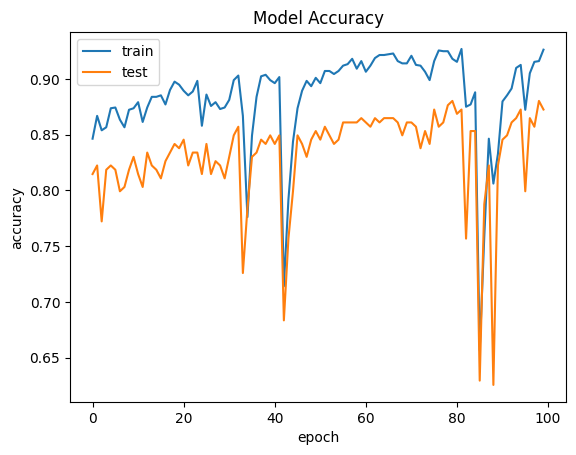

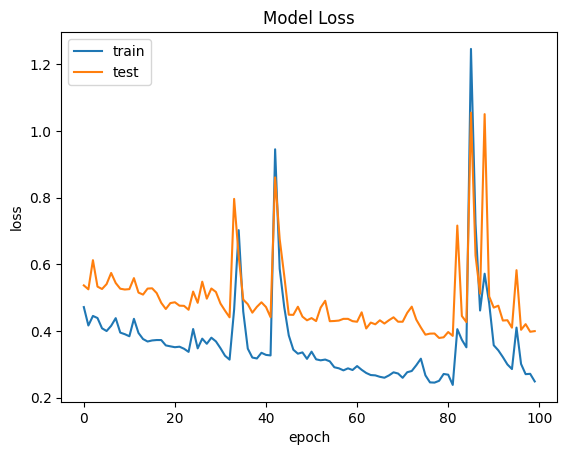

In [94]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [96]:
predictions = model.predict(x_test)
predictions

9/9 [==============================] - 0s 8ms/step


array([[4.8039956e-03, 3.9297360e-04, 1.9129114e-03, ..., 1.2555996e-01,
        1.0416002e-05, 1.5781609e-04],
       [2.7228389e-05, 1.6260776e-04, 9.9231166e-01, ..., 6.7586699e-03,
        7.9723786e-06, 1.0383974e-06],
       [2.6541504e-03, 6.9060293e-03, 4.5072455e-02, ..., 8.3436829e-01,
        4.1779385e-05, 1.1920640e-04],
       ...,
       [1.1053245e-03, 3.8359251e-03, 4.3370053e-02, ..., 9.0259570e-01,
        1.0395710e-03, 2.4091305e-04],
       [3.0406672e-04, 3.3800465e-05, 1.7472643e-04, ..., 1.8366902e-03,
        1.8046541e-05, 3.7910904e-05],
       [6.7482352e-02, 1.8423316e-01, 1.2080350e-02, ..., 1.0961472e-02,
        3.1415546e-01, 3.8117778e-01]], dtype=float32)

In [97]:
print(predictions[:5], y_test[:5])

[[4.8039956e-03 3.9297360e-04 1.9129114e-03 1.3473505e-02 8.0483216e-01
  4.8856147e-02 1.2555996e-01 1.0416002e-05 1.5781609e-04]
 [2.7228389e-05 1.6260776e-04 9.9231166e-01 4.0916054e-04 1.6426035e-04
  1.5729236e-04 6.7586699e-03 7.9723786e-06 1.0383974e-06]
 [2.6541504e-03 6.9060293e-03 4.5072455e-02 1.2926196e-02 9.4030418e-02
  3.8815218e-03 8.3436829e-01 4.1779385e-05 1.1920640e-04]
 [1.7433136e-04 1.3505308e-03 9.7731566e-01 2.0975752e-03 1.4912135e-03
  3.2579078e-04 1.7197844e-02 1.9205614e-05 2.8000906e-05]
 [1.7874534e-03 6.3965279e-03 2.7246561e-02 8.0253612e-03 5.9840657e-02
  3.4748209e-03 8.9307159e-01 5.0378385e-05 1.0667393e-04]] [[0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [98]:
model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 10ms/step - loss: 0.3993 - accuracy: 0.8726


[0.39933523535728455, 0.8725868463516235]

In [99]:
model_loaded = tf.keras.models.load_model('best_model.h5')

In [100]:
model_loaded.evaluate(x_test, y_test)

9/9 [==============================] - 1s 10ms/step - loss: 0.3808 - accuracy: 0.8803


[0.3807605803012848, 0.8803088665008545]